## Import required libraries

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

### Initialize a list with learning rates

In [2]:
LRARRAY = [0.004, 0.006 , 0.008 , 0.01 , 0.016, 0.02, 0.026 , 0.03]

### Initialize the input and output with the truth table of XOR
#### condition : - if and only if one input is true , the output is true


In [3]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

### Create the XOR model


*   The input is fed to a hidden layer with 10 neuron
*   The output of the first hidden layer is fed to output layer with 1 output neuron


In [4]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 10)
        self.lin2 = nn.Linear(10, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        #x = F.tanh(x)
        return x

### Model summary


*   the model has 41 parameters




In [5]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 2, 10]              30
            Linear-2                 [-1, 2, 1]              11
Total params: 41
Trainable params: 41
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Initialize the model weights


*   use random weights from a normal distribution between 0 - 1




In [6]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

### Loss function of the model - L1 loss

In [7]:
loss_func = nn.L1Loss()

### wrapper function to execute the model

In [8]:

def runModel(optimizer , lr):

  epochs = 2001
  steps = X.size(0)
  lossList = []

  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint(X.size(0))
          x_var = Variable(X[data_point], requires_grad=False)
          y_var = Variable(Y[data_point], requires_grad=False)
        
          optimizer.zero_grad()
          y_hat = model(x_var)
          loss = loss_func.forward(y_hat, y_var)
          loss.backward()
          optimizer.step()

      if i % 50 == 0:
          print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))
          
      if i % 100 == 0:
          lossList.append(loss.data.numpy())

  lr_lossDict[lr] = lossList

### execute the model iteratively


*   The model is executed for different values of learning rate




In [9]:
lr_lossDict = {}

for i in range(len(LRARRAY)):
  lr = LRARRAY[i]
  optimizer = optim.SGD(model.parameters(), lr=LRARRAY[i], momentum=0.9)
  runModel(optimizer , lr)


Epoch: 0, Loss: 0.3108300268650055, 
Epoch: 50, Loss: 0.0772470161318779, 


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 100, Loss: 0.04166519641876221, 
Epoch: 150, Loss: 0.12384019047021866, 
Epoch: 200, Loss: 0.23823031783103943, 
Epoch: 250, Loss: 0.20995795726776123, 
Epoch: 300, Loss: 0.003532499074935913, 
Epoch: 350, Loss: 0.09821784496307373, 
Epoch: 400, Loss: 0.08268201351165771, 
Epoch: 450, Loss: 0.08046019077301025, 
Epoch: 500, Loss: 0.1591365933418274, 
Epoch: 550, Loss: 0.09526894986629486, 
Epoch: 600, Loss: 0.21207213401794434, 
Epoch: 650, Loss: 0.048948973417282104, 
Epoch: 700, Loss: 0.051078081130981445, 
Epoch: 750, Loss: 0.07790344953536987, 
Epoch: 800, Loss: 0.06497450172901154, 
Epoch: 850, Loss: 0.04130259156227112, 
Epoch: 900, Loss: 0.09346151351928711, 
Epoch: 950, Loss: 0.09112074971199036, 
Epoch: 1000, Loss: 0.01703992486000061, 
Epoch: 1050, Loss: 0.05147549510002136, 
Epoch: 1100, Loss: 0.12159109115600586, 
Epoch: 1150, Loss: 0.05173468589782715, 
Epoch: 1200, Loss: 0.014163196086883545, 
Epoch: 1250, Loss: 0.06457895040512085, 
Epoch: 1300, Loss: 0.1706227064

### Plot of model loss 


*   model loss for different learning rate is plotted to choose the optimal learning rate




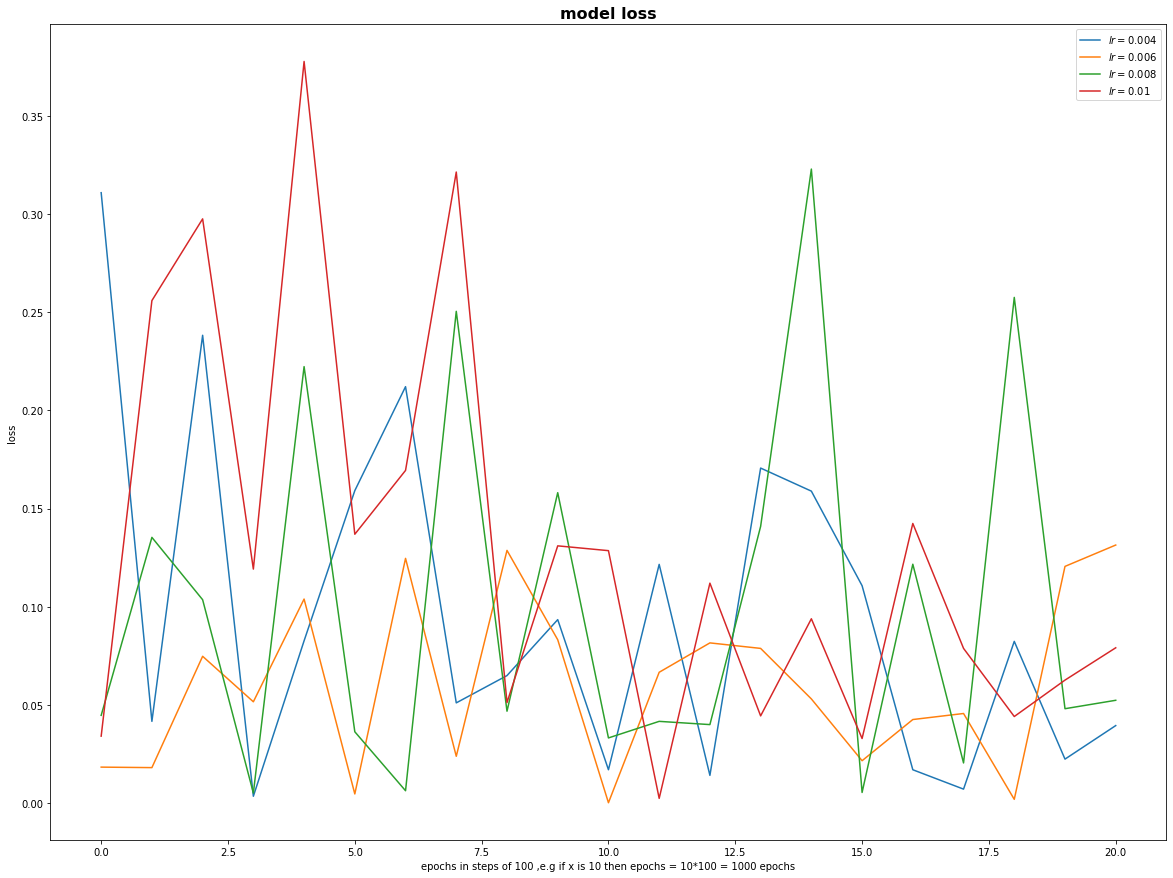

In [11]:

xpoints = np.arange(len(lr_lossDict[LRARRAY[0]]))
ypoints0 = lr_lossDict[LRARRAY[0]]
ypoints2 = lr_lossDict[LRARRAY[1]]
ypoints4 = lr_lossDict[LRARRAY[2]]
ypoints6 = lr_lossDict[LRARRAY[3]]
ypoints8 = lr_lossDict[LRARRAY[4]]
ypoints9 = lr_lossDict[LRARRAY[5]]
ypoints10 = lr_lossDict[LRARRAY[6]]
ypoints12 = lr_lossDict[LRARRAY[7]]
#ypoints14 = lr_lossDict[LRARRAY[14]]

plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(xpoints, ypoints0 , label = "$lr="+str(LRARRAY[0])+"$" )
plt.plot(xpoints, ypoints2, label = "$lr="+str(LRARRAY[1])+"$" )
plt.plot(xpoints, ypoints4, label = "$lr="+str(LRARRAY[2])+"$" )

plt.plot(xpoints, ypoints6, label = "$lr="+str(LRARRAY[3])+"$" )

#plt.plot(xpoints, ypoints8, label = "$lr="+str(LRARRAY[4])+"$" )

#plt.plot(xpoints, ypoints9, label = "$lr="+str(LRARRAY[5])+"$" )

#plt.plot(xpoints, ypoints10, label = "$lr="+str(LRARRAY[6])+"$" )

#plt.plot(xpoints, ypoints12, label = "$lr="+str(LRARRAY[7])+"$" )



#plt.plot(xpoints, ypoints14, label = "$lr="+str(LRARRAY[14])+"$" )"""


plt.legend(loc="upper right")

plt.title("model loss", fontsize=16, fontweight='bold')
plt.xlabel("epochs in steps of 100 ,e.g if x is 10 then epochs = 10*100 = 1000 epochs")
plt.ylabel("loss")
plt.show()

# The model performs best at a learning rate of 0.006 